# Interpolación polinómica

#### Datos /puntos: 

$\quad D=\{(x_n,y_n)\}_{n=0}^N$ 

#### Interpolador polinómico: 

$\quad y(x \ ; \mathbf{w})=\sum_{m=0}^{M-1} w_m x^m$

#### Parámetros a estimar (a partir de los datos): 

- Orden del polinomio: $M$
- Coeficientes del polinomio: $\mathbf{w}$

#### Objetivo:

Determinar los parámetros del polinomio (a partir de $D$)

- Orden del polinomio: $M$
- Coeficientes del polinomio: $\mathbf{w}$

de forma que este sea capaz de predecir (interpolar) el valor de $y$ para valores de $x$ que no estan en $D$. 

#### Planteamiento como problema de aprendizaje supervisado (regresión)

$D$ son los datos de entrenamiento. La matriz $\mathbf{X}$ de datos de entrenamiento se reduce a un vector columna con los valores $\{x_n\}_{n=1}^N$, es decir, sólo hay un atributo ($d=1$) que es la variable independiente. La variable dependiente $y$ es la variable objetivo. Por tanto, los valores $\{y_n\}_{n=1}^N$ son las etiquetas de los datos de entrenamiento $\{x_n\}_{n=1}^N$. La fase de entrenamiento consiste en determinar los coeficientes del polinomio óptimos $\mathbf{w}^*$ para un valor de $M$ dado de acuerdo a un criterio determinado. El orden del polinomio $M$ es un hiperparámetro del modelo. Los coeficientes del polinomio se llaman coeficientes de regresión.

### Importa modulos

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error

### Genero los datos de entrenamiento
Genero un conjunto de $N$ datos de entrenamiento $\ D=\{(x_n,y_n=h(x_n)+r_n)\}_{n=0}^N \ $,  donde los $x_n$ estan distribuidos uniformemente en el intervalo $[0,1]$, $\ r_n$ es WGN  y $\ h(x)=x \sin(2 \pi x)$. 

In [2]:
def h(x):
    return x*np.sin(2*np.pi*x)

N_train = 10 # numero de datos de entrenamiento
var_ruido = 0.04 # Varianza de ruido

x_train = np.linspace(0, 1, N_train)
ruido = np.random.normal(0,np.sqrt(var_ruido),size=N_train)
y_train = h(x_train) + ruido

Represento los datos de entrenamiento $D$ junto con la función subyacente $h(x)$

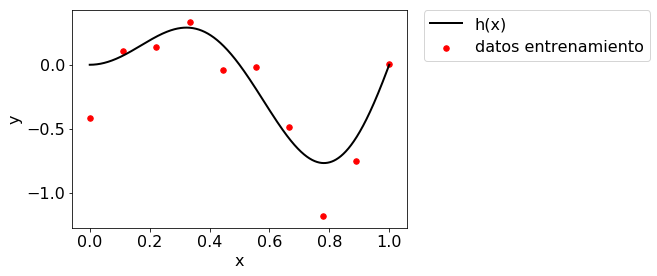

In [3]:
Npuntos=1000
x = np.linspace(0, 1, Npuntos)
plt.scatter(x_train, y_train, color='red', s=30, marker='o',label="datos entrenamiento")
plt.plot(x, h(x), color='black', linewidth=2,label="h(x)")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.,prop={'size':16})
plt.ylabel('y',size=16)
plt.xlabel('x',size=16)
plt.tick_params(labelsize=16)
plt.rcParams["figure.figsize"] = [10,5]
plt.show()

### Cálculo de los coeficientes de regresión óptimos

Para un orden $M$ dado se considera la siguiente función de coste

$\quad J(\mathbf{w}) = \frac{1}{N} \sum_{n=1}^N (y(x_n ; \mathbf{w})-y_n)^2$,

que es la media de los errores cuadráticos (MSE) entre los datos de entrenamiento y la curva de regresión. 

Entonces, se eligen los coeficientes del polinomio $\mathbf{w}$ que minimizen la función de coste

$\quad \mathbf{w}^* = \underset{\mathbf{w}} {\operatorname{argmin}} \hspace{2mm} J(\mathbf{w})$

La solución a este problema de optimización es $\quad \mathbf{w}^* = (\boldsymbol \phi^T \boldsymbol \phi)^{-1} \boldsymbol \phi^T \mathbf{Y} = \boldsymbol \phi^\# \mathbf{Y}$,

donde
\begin{equation}
    \boldsymbol \phi = 
    \begin{bmatrix}
    x_1^0 & x_1^1 & \cdots & x_1^{M-1} \\
    x_2^0 & x_2^1 & \cdots & x_2^{M-1} \\
    \vdots & \vdots & \ddots & \vdots \\
    x_N^0 & x_N^1 & \cdots & x_N^{M-1}
   \end{bmatrix}, 
    \quad \mathbf{Y}=
    \begin{bmatrix}
    y_1 \\
    y_2 \\
    \vdots \\
    y_N
   \end{bmatrix}. 
\end{equation}

A continuación, para un valor de M dado, represento el polinómio solución $f(x \ ; \mathbf{w}^*)$, la función subyacente $h(x)$ y los datos de entrenamiento.

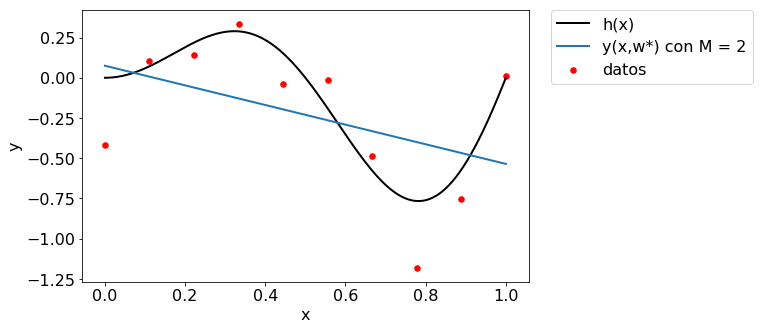

In [13]:
M=2 
poly = PolynomialFeatures(M-1)
xp_train = poly.fit_transform(x_train.reshape(-1,1))
regr_poly = linear_model.Ridge(0.0) 
regr_poly.fit(xp_train,y_train)
xp = poly.fit_transform(x.reshape(-1,1))
f_x=regr_poly.predict(xp)
plt.scatter(x_train, y_train, color='red', s=30, marker='o',label="datos")
plt.plot(x, h(x), color='black', linewidth=2,label="h(x)")
plt.plot(x, f_x, linewidth=2,label="y(x,w*) con M = %d" % M)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.,prop={'size':16})
plt.ylabel('y',size=16)
plt.xlabel('x',size=16)
plt.tick_params(labelsize=16)
plt.rcParams["figure.figsize"] = [10,5]
plt.show()

### Prestaciones del regresor

El MSE sobre los datos de entrenamiento

$\quad J(\mathbf{w}^*) = \frac{1}{N} \sum_{n=1}^{N} (y(x_n ; \mathbf{w}^*)-y_n)^2$,  y el correspondiente error RMS $\quad E=\sqrt{J(\mathbf{w}^*)}$

El MSE (ó $E$) sobre los datos de entrenamiento $D$ no es una buena medida de la calidad del interpolador. Las prestaciones del regresor se deben evaluar sobre un conjunto de datos de test $D_t$ diferentes al de entrenamiento $D$. Eso si, los datos de test se deben generar con el mismo modelo (desconocido) que los de entrenamiento.

In [5]:
N_test=1000 # numero de datos de test
x_test = np.linspace(0, 1, N_test)
ruido = np.random.normal(0,np.sqrt(var_ruido),size=N_test)
y_test = h(x_test) + ruido

A continuación evaluo el polinomio solución $\ y(x \ ; \mathbf{w}^*) \ $ en los datos de test con los coeficientes óptimos obtenidos en la fase de entrenamiento. Entonces, el MSE sobre los datos de test

$\quad J_t(\mathbf{w}^*) = \frac{1}{N_t} \sum_{n=1}^{N_t} (y(x_n ; \mathbf{w}^*)-y_n)^2$,

y el error RMS sobre los datos de test: $\quad E_t=\sqrt{J_t(\mathbf{w}^*)}$.

A continuación se calcula el error RMS sobre los datos de entrenamiento y test para distintos valores de $M$

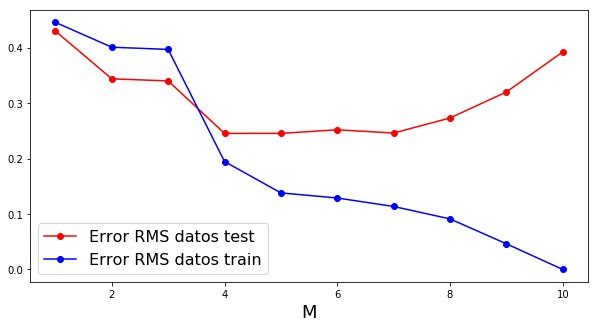

In [6]:
M=np.arange(1,N_train+1)
E_rms_test=np.zeros(len(M),float)   # Inicializa
E_rms_train=np.zeros(len(M),float)  # Inicializa
for count,orden in enumerate(M):
    
        poly = PolynomialFeatures(orden-1)       
        xp_train=poly.fit_transform(x_train.reshape(-1,1))
        regr_poly = linear_model.Ridge(0.0) 
        regr_poly.fit(xp_train, y_train) # entrena el regresor con los datos de entrenamiento 
        
        f_train=regr_poly.predict(xp_train) # prediccion sobre los datos de entrenamiento
        E_rms_train[count]=np.sqrt(mean_squared_error(f_train, y_train))
        
        xp_test=poly.fit_transform(x_test.reshape(-1,1))
        f_test=regr_poly.predict(xp_test)
        E_rms_test[count]=np.sqrt(mean_squared_error(f_test, y_test))

        
# Figura de errores RMS
plt.plot(M, E_rms_test, 'ro-', label="Error RMS datos test")
plt.plot(M, E_rms_train, 'bo-', label="Error RMS datos train")
plt.xlabel('M',size=18)
plt.rc('xtick', labelsize=16) 
plt.rc('ytick', labelsize=16) 
plt.legend(loc='best',prop={'size':16})
plt.rcParams["figure.figsize"] = [9,6]
plt.show()

### Sobreajuste
Se produce sobreajuste cuando el número de parámetros del modelo, $M$ en este caso, es del orden del número de datos de entrenamiento $N$.

Cuando hay sobreajuste la predicción sobre los datos de entrenamiento es muy buena, pero es mala sobre los datos de test. Además, los valores de los coeficientes de regresión $\mathbf{w}^*$ tienden a hacerse muy grandes

In [7]:
M=10
poly = PolynomialFeatures(M-1)
xp_train = poly.fit_transform(x_train.reshape(-1,1))
regr_poly = linear_model.Ridge(0.0) 
regr_poly.fit(xp_train,y_train)
              
w=regr_poly.coef_
w[0]=regr_poly.intercept_
print()
print('w*: ')
for i in range(len(w)):
    print('   ',w[i])


w*: 
    -0.417790407262
    102.086612977
    -2163.32137271
    18637.2553412
    -84091.6249914
    219857.596152
    -345033.02568
    320360.069981
    -162119.782536
    34451.1737902


### Regularización
Se añade un termino de reguralizacion a la función de coste 

$\quad J(\mathbf{w}^*) = \frac{1}{N} \sum_{n=1}^{N} (y(x_n ; \mathbf{w}^*)-y_n)^2 + \alpha \ ||\mathbf{w}||^2$,

donde $\alpha$ se conoce como factor de regularización y controla la influencia relativa del término de regularización frente el MSE en la función de coste. Los coeficientes del polinomio $\mathbf{w}$ que minimizan la función de coste regularizada

$\quad \mathbf{w}^* = (\alpha \mathbf{I} + \boldsymbol \phi^T \boldsymbol \phi)^{-1} \boldsymbol \phi^T \mathbf{Y}$.

A continuación se muestra el efecto del término de regularización comparando los polinomios interpoladores obtenidos con y sin regularización.

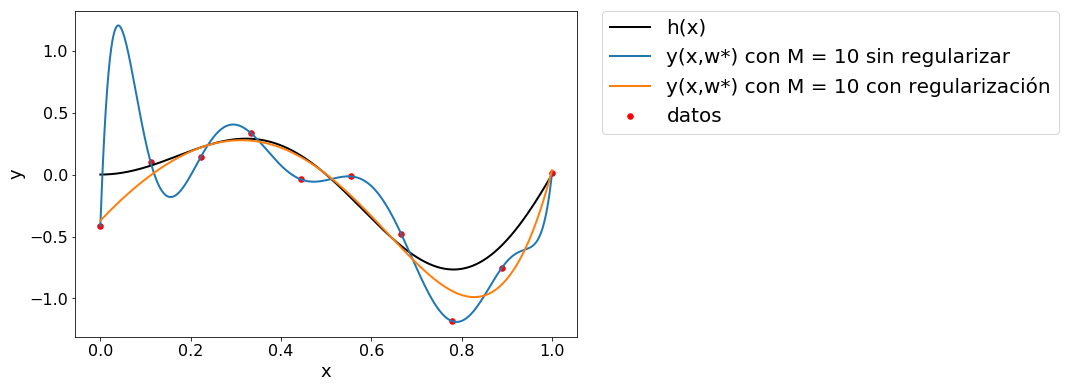

In [8]:
M=10
poly = PolynomialFeatures(M-1)
xp_train = poly.fit_transform(x_train.reshape(-1,1))
xp_test = poly.fit_transform(x_test.reshape(-1,1))

# Regresion sin regularizar
regr_poly = linear_model.Ridge(0.0) 
regr_poly.fit(xp_train,y_train)
f_train=regr_poly.predict(xp_train)
E_train = np.sqrt(mean_squared_error(f_train, y_train))
f_test=regr_poly.predict(xp_test)
E_test = np.sqrt(mean_squared_error(f_test, y_test))

# Regresion con regularizacion
alfa=1e-4
regr_poly_reg = linear_model.Ridge(alfa) 
regr_poly_reg.fit(xp_train,y_train)
f_train_reg=regr_poly_reg.predict(xp_train)
E_train_reg = np.sqrt(mean_squared_error(f_train_reg, y_train))
f_test_reg=regr_poly_reg.predict(xp_test)
E_test_reg = np.sqrt(mean_squared_error(f_test_reg, y_test))

# Dibujo los polinomios de regresión con y sin regularizacion
plt.scatter(x_train, y_train, color='red', s=30, marker='o',label="datos")
plt.plot(x_test, h(x_test), color='black', linewidth=2,label="h(x)")
plt.plot(x_test, f_test, linewidth=2,label="y(x,w*) con M = %d sin regularizar" % M)
plt.plot(x_test, f_test_reg, linewidth=2,label="y(x,w*) con M = %d con regularización" % M)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.,prop={'size':20})
plt.ylabel('y',size=18)
plt.xlabel('x',size=18)
plt.rc('xtick', labelsize=16) 
plt.rc('ytick', labelsize=16) 
plt.rcParams["figure.figsize"] = [8,5]
plt.show()

Estos son los valores de Error RMS para los polinomios óptimos con y sin regularización:

In [9]:
E_train = np.sqrt(mean_squared_error(f_train, y_train))
E_test = np.sqrt(mean_squared_error(f_test, y_test))
E_train_reg = np.sqrt(mean_squared_error(f_train_reg, y_train))
E_test_reg = np.sqrt(mean_squared_error(f_test_reg, y_test))

print()
print('--- Sin regularizacion:')
print('Error RMS datos test:',E_test)
print('Error RMS datos train:',E_train)
print()
print('--- Con regularizacion:')
print('Error RMS datos test:',E_test_reg)
print('Error RMS datos train:',E_train_reg)


--- Sin regularizacion:
Error RMS datos test: 0.3921342737
Error RMS datos train: 2.63189440687e-11

--- Con regularizacion:
Error RMS datos test: 0.248231581834
Error RMS datos train: 0.130693906453


Estos son los coeficientes óptimos de los polinomios óptimos con y sin regularización:

In [10]:
w=regr_poly.coef_
w[0]=regr_poly.intercept_
w_reg=regr_poly_reg.coef_
w_reg[0]=regr_poly_reg.intercept_
print('w* sin regularización: ')
for i in range(len(w)):
    print('   ',w[i])
print()
print('w* con regularización: ')
for i in range(len(w_reg)):
    print('   ',w_reg[i])

w* sin regularización: 
    -0.417790407262
    102.086612977
    -2163.32137271
    18637.2553412
    -84091.6249914
    219857.596152
    -345033.02568
    320360.069981
    -162119.782536
    34451.1737902

w* con regularización: 
    -0.372137498892
    3.85177288385
    -4.73667503131
    -2.49447156356
    -2.03019139811
    0.0123629904177
    2.5586316223
    3.67487834929
    2.11358818302
    -2.54333793936


El factor de regularización $\alpha$ es un hiperparámetro del modelo que hay que ajustar. A continuación se muestran los valores del Error RMS sobre los datos de test para distintos valores del factor de regularización.

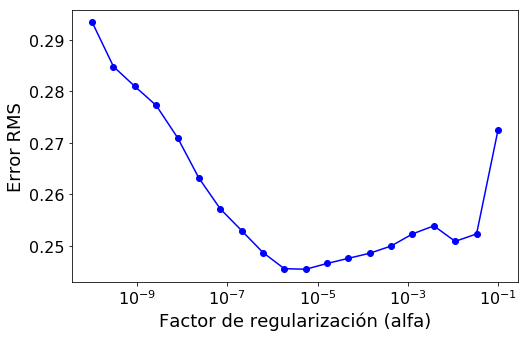

El factor de regularizacion óptimo: 5.45559478117e-06


In [12]:
alfas=np.logspace(-10,-1,20) # valores del factor de regularizacion

M=10
poly = PolynomialFeatures(M-1)
xp_train=poly.fit_transform(x_train.reshape(-1,1))
xp_test=poly.fit_transform(x_test.reshape(-1,1))

E_rms=np.zeros(len(alfas))
for i,alfa in enumerate(alfas):
    regr_poly = linear_model.Ridge(alfa) 
    regr_poly.fit(xp_train, y_train)
    f_test=regr_poly.predict(xp_test)
    E_rms[i]=np.sqrt(mean_squared_error(f_test, y_test))
    #print('alfa:',alfa,',  Error RMS:',E_rms[i])

plt.semilogx(alfas,E_rms,'bo-')
plt.ylabel('Error RMS',size=18)
plt.xlabel('Factor de regularización (alfa)',size=18)
plt.rc('xtick', labelsize=16) 
plt.rc('ytick', labelsize=16) 
#plt.title('Error RMS frente parametro de regularizacion')
plt.rcParams["figure.figsize"] = [8,5]
plt.show()

print('El factor de regularizacion óptimo:',alfas[np.argmin(E_rms)])